<a href="https://colab.research.google.com/github/Invelt/COMPLING/blob/main/12_dit_coli_backprop_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural networks

We are using Keras. Don't forget to install it (e.g., `pip install keras`)

In [1]:
!pip install keras
# Importing all the dependencies necessary for this notebook
import matplotlib.pyplot as plt
from math import e
import numpy as np

In [2]:
fig = plt.figure(figsize=(5,5))
x = np.arange(-10.0, 10.0, 0.01)
print(x)

[-10.    -9.99  -9.98 ...   9.97   9.98   9.99]


<Figure size 360x360 with 0 Axes>

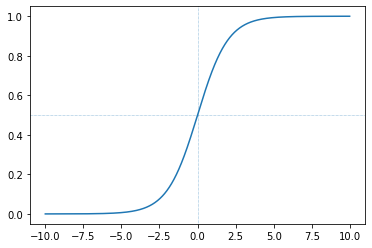

In [3]:
y = 1 / (1 + e**(-x))
plt.plot(x, y)
plt.axhline(y=0.5, xmin=-10, xmax=10, linestyle=":", linewidth=0.5)
plt.axvline(x=0, ymin=-10, ymax=10, linestyle=":", linewidth=0.5)
fig.savefig("10_sigmoid.png")
plt.show()

In [4]:
#Curious abput what is in x and y?
print("x:", x)
print("y:", y)

x: [-10.    -9.99  -9.98 ...   9.97   9.98   9.99]
y: [4.53978687e-05 4.58541039e-05 4.63149240e-05 ... 9.99953220e-01
 9.99953685e-01 9.99954146e-01]


Back to the slides

## Neural network for XOR

With non-linear functions and more than one neuron, we can learn more sophisticated functions

In [7]:
# Base Keras model class
from keras.models import Sequential
# We want a fully-connected layer of neurons
from keras.layers import Dense 
# Now we have access to activation functions :)
from keras.layers import Activation
# We use stochastic gradient descent
from tensorflow.keras.optimizers import SGD

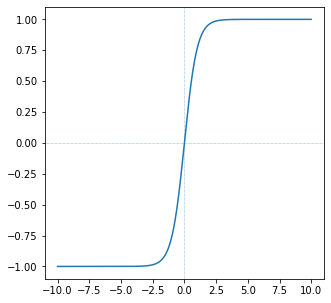

In [8]:
# We will see this in a second. Let's scroll down

fig = plt.figure(figsize=(5,5))
x = np.arange(-10.0, 10.0, 0.01)
y = (e**x - e**(-x))/(e**x + e**(-x))
plt.plot(x, y)
plt.axhline(y=0, xmin=-10, xmax=10, linestyle=":", linewidth=0.5)
plt.axvline(x=0, ymin=-10, ymax=10, linestyle=":", linewidth=0.5)
fig.savefig("10_tanh.png")
plt.show()

In [ ]:
!pip3 install nlpia
import pandas as pd

from nlpia.data.loaders import get_data

# Loading a labeled corpus: spam
sms = get_data('sms-spam')
print(sms[:-10])

# Just setting up the printing properties
pd.options.display.width = 120

In [19]:
# For display purposes: spam instances have a "!" added to the label
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in \
         zip(range(len(sms)), sms.spam)]
print(index[:20])

['sms0', 'sms1', 'sms2!', 'sms3', 'sms4', 'sms5!', 'sms6', 'sms7', 'sms8!', 'sms9!', 'sms10', 'sms11!', 'sms12!', 'sms13', 'sms14', 'sms15!', 'sms16', 'sms17', 'sms18', 'sms19!']


In [20]:
# Creating a pandas df, using the data and the new index
sms = pd.DataFrame(sms.values, columns=sms.columns, index=index)
sms['spam'] = sms.spam.astype(int)
print(sms)
# len(sms)

          spam                                               text
sms0         0  Go until jurong point, crazy.. Available only ...
sms1         0                      Ok lar... Joking wif u oni...
sms2!        1  Free entry in 2 a wkly comp to win FA Cup fina...
sms3         0  U dun say so early hor... U c already then say...
sms4         0  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
sms4832!     1  This is the 2nd time we have tried 2 contact u...
sms4833      0               Will ü b going to esplanade fr home?
sms4834      0  Pity, * was in mood for that. So...any other s...
sms4835      0  The guy did some bitching but I acted like i'd...
sms4836      0                         Rofl. Its true to its name

[4837 rows x 2 columns]


In [21]:
# QUESTION: what am I getting with this sum?
sms.spam.sum()

638

In [22]:
from nltk.tokenize.casual import casual_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorising the corpus
tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()
# QUESTION: what is the number on the right?
print(tfidf_docs.shape)
print(tfidf_docs)

(4837, 9232)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
# # Instances for XOR
# x_train = np.array(
#     [[0, 0],
#     [0, 1],
#     [1, 0],
#     [1, 1]])
# y_train = np.array(
#     [[0],
#     [1],
#     [1],
#     [0]])

# Instances for SMS SPAM MESSAGES
x_train = tfidf_docs
y_train = sms.spam
#print(len(sms.spam)) #this is the same len as the number of rows in tfidf_docs

# Defining the model
model = Sequential()
num_neurons = 10

# Hidden layer followed with tanh activation function
model.add(Dense(num_neurons, input_dim=9232)) #this has to be the size of each element of x_train
model.add(Activation('tanh'))

# Output layer with one neuron and sigmoid activation function 
# (let's scroll up and see what is tanh: Hyperbolic tangent of x)
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()
# Let's go to the slides

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                92330     
                                                                 
 activation_6 (Activation)   (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
 activation_7 (Activation)   (None, 1)                 0         
                                                                 
Total params: 92,341
Trainable params: 92,341
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Building the model with stochastic gradient descent and alpha=0.1
sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [29]:
# Predicting with this model (before training)
model.predict(x_train)

array([[0.500554  ],
       [0.5019083 ],
       [0.49395928],
       ...,
       [0.5037754 ],
       [0.490339  ],
       [0.49714065]], dtype=float32)

In [30]:
# Train (fit) the model (if it doesn't converge, add more epochs)
model.fit(x_train, y_train, epochs=200)

In [31]:
# Predicting with this model (after training)
predict_x=model.predict(x_train)
print(predict_x) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[[4.2372935e-06]
 [6.9293668e-07]
 [9.9990475e-01]
 ...
 [1.9146439e-05]
 [9.8976627e-05]
 [2.9069185e-04]]
[0 0 0 ... 0 0 0]


Finally, you can save your model to, for instance, deploy it later on

In [33]:
import h5py
model_structure = model.to_json()
with open("basic_model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("basic_weights.h5")